# 3장 후반부 코드

### 작성 : [PinkWink](http://pinkwink.kr) 

## 네이버 영화 평점 기준 영화의 평점 변화 확인하기

In [1]:
from bs4 import BeautifulSoup  
import pandas as pd

In [60]:
from urllib.request import urlopen

url_base = "http://movie.naver.com/"
url_syb = "movie/sdb/rank/rmovie.nhn?sel=cur&date=20170804"

page = urlopen(url_base+url_syb) # url 이 길어서 자른것을 붙임.

soup = BeautifulSoup(page, "html.parser")
soup


<!DOCTYPE html>

<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="me2:image">
<meta content="네이버영화 " property="me2:post_tag">
<meta content="네이버영화" property="me2:category1"/>
<meta content="" property="me2:category2"/>
<meta content="랭킹 : 네이버 영화" property="og:title"/>
<meta content="영화, 영화인, 예매, 박스오피스 랭킹 정보 제공" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&amp;date=20170804" property="og:url"/>
<meta content="http://static.naver.net/m/movie/icons/OG_270_270.png" property="og:image"/><!-- http://static.naver.net/m/movie/im/navermovie.jpg -->
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
<meta content="네이버 영화" property="og:article:author"/>


In [61]:
soup.find_all('div', 'tit5')

[<div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=62586" title="다크 나이트">다크 나이트</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=164290" title="킹 오브 프리즘 프라이드 더 히어로">킹 오브 프리즘 프라이드 더 히어로</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=152160" title="킹 오브 프리즘">킹 오브 프리즘</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=10448" title="오즈의 마법사">오즈의 마법사</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=154437" title="내 사랑">내 사랑</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=160135" title="서서평, 천천히 평온하게">서서평, 천천히 평온하게</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=10217" title="로보캅">로보캅</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=76309" title="플립">플립</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=159054" title="명탐정 코난:진홍의 연가">명탐정 코난:진홍의 연가</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=3182

In [62]:
soup.find_all('div', 'tit5')[0]

<div class="tit5">
<a href="/movie/bi/mi/basic.nhn?code=62586" title="다크 나이트">다크 나이트</a>
</div>

In [63]:
soup.find_all('div', 'tit5')[0].a

<a href="/movie/bi/mi/basic.nhn?code=62586" title="다크 나이트">다크 나이트</a>

In [64]:
soup.find_all('div', 'tit5')[0].a.string

'다크 나이트'

In [65]:
soup.find_all('td', 'point')

[<td class="point">9.32</td>,
 <td class="point">9.28</td>,
 <td class="point">9.25</td>,
 <td class="point">9.23</td>,
 <td class="point">9.23</td>,
 <td class="point">9.23</td>,
 <td class="point">9.21</td>,
 <td class="point">9.20</td>,
 <td class="point">9.18</td>,
 <td class="point">9.18</td>,
 <td class="point">9.14</td>,
 <td class="point">9.10</td>,
 <td class="point">9.09</td>,
 <td class="point">9.05</td>,
 <td class="point">9.05</td>,
 <td class="point">9.02</td>,
 <td class="point">9.00</td>,
 <td class="point">8.99</td>,
 <td class="point">8.94</td>,
 <td class="point">8.93</td>,
 <td class="point">8.91</td>,
 <td class="point">8.91</td>,
 <td class="point">8.87</td>,
 <td class="point">8.86</td>,
 <td class="point">8.84</td>,
 <td class="point">8.76</td>,
 <td class="point">8.76</td>,
 <td class="point">8.74</td>,
 <td class="point">8.71</td>,
 <td class="point">8.62</td>,
 <td class="point">8.59</td>,
 <td class="point">8.58</td>,
 <td class="point">8.49</td>,
 <td class

In [8]:
len(soup.find_all('td', 'point')) # 길이 확인 

49

In [68]:
soup.find_all('td', 'point')[0].string # 'td'의 point에서 0번째를 가지고와 string(문자열) 으로

'9.48'

In [47]:
movie_name = [soup.find_all('div', 'tit5')[n].a.string for n in range(0, 49)]
movie_name

['그린 북',
 '가버나움',
 '가나의 혼인잔치: 언약',
 '디지몬 어드벤처 라스트 에볼루션 : 인연',
 '먼 훗날 우리',
 '베일리 어게인',
 '언플랜드',
 '원더',
 '극장판 바이올렛 에버가든',
 '아일라',
 '당갈',
 '포드 V 페라리',
 '주전장',
 '쇼생크 탈출',
 '터미네이터 2:오리지널',
 '나 홀로 집에',
 '덕구',
 '라이언 일병 구하기',
 '보헤미안 랩소디',
 '월-E',
 '클래식',
 '사운드 오브 뮤직',
 '헬프',
 '빽 투 더 퓨쳐',
 '매트릭스',
 '인생은 아름다워',
 '부활: 그 증거',
 '포레스트 검프',
 '살인의 추억',
 '위대한 쇼맨',
 '글래디에이터',
 '소년시절의 너',
 '타이타닉',
 '센과 치히로의 행방불명',
 '아이즈 온 미 : 더 무비',
 '토이 스토리 3',
 '어벤져스: 엔드게임',
 '알라딘',
 '죽은 시인의 사회',
 '캐스트 어웨이',
 '헌터 킬러',
 '레옹',
 '동주',
 '반지의 제왕: 왕의 귀환',
 '히든 피겨스',
 '아이 캔 스피크',
 '쉰들러 리스트',
 '집으로...',
 '클레멘타인']

In [15]:
movie_point = [soup.find_all('td', 'point')[n].string for n in range(0, 49)]
movie_point

['9.32',
 '9.31',
 '9.30',
 '9.26',
 '9.25',
 '9.23',
 '9.22',
 '9.21',
 '9.20',
 '9.19',
 '9.18',
 '9.14',
 '9.10',
 '9.10',
 '9.09',
 '9.05',
 '9.05',
 '9.05',
 '9.02',
 '9.00',
 '8.93',
 '8.91',
 '8.90',
 '8.87',
 '8.86',
 '8.78',
 '8.76',
 '8.75',
 '8.72',
 '8.71',
 '8.62',
 '8.59',
 '8.59',
 '8.49',
 '8.48',
 '8.47',
 '8.39',
 '8.34',
 '8.33',
 '8.10',
 '7.97',
 '7.85',
 '7.69',
 '7.38',
 '7.26',
 '6.88',
 '6.58',
 '6.09',
 '5.17']

In [23]:
date = pd.date_range('2017-5-1', periods=100, freq='D') # freq='D' : Date 양식 , periods=100 : 100 일간, '2017-5-1' 부터 
date

DatetimeIndex(['2017-05-01', '2017-05-02', '2017-05-03', '2017-05-04',
               '2017-05-05', '2017-05-06', '2017-05-07', '2017-05-08',
               '2017-05-09', '2017-05-10', '2017-05-11', '2017-05-12',
               '2017-05-13', '2017-05-14', '2017-05-15', '2017-05-16',
               '2017-05-17', '2017-05-18', '2017-05-19', '2017-05-20',
               '2017-05-21', '2017-05-22', '2017-05-23', '2017-05-24',
               '2017-05-25', '2017-05-26', '2017-05-27', '2017-05-28',
               '2017-05-29', '2017-05-30', '2017-05-31', '2017-06-01',
               '2017-06-02', '2017-06-03', '2017-06-04', '2017-06-05',
               '2017-06-06', '2017-06-07', '2017-06-08', '2017-06-09',
               '2017-06-10', '2017-06-11', '2017-06-12', '2017-06-13',
               '2017-06-14', '2017-06-15', '2017-06-16', '2017-06-17',
               '2017-06-18', '2017-06-19', '2017-06-20', '2017-06-21',
               '2017-06-22', '2017-06-23', '2017-06-24', '2017-06-25',
      

In [66]:
import urllib
from tqdm import tqdm_notebook

movie_date = []
movie_name = []
movie_point = []

for today in tqdm_notebook(date):
    html = "http://movie.naver.com/" + \
                                    "movie/sdb/rank/rmovie.nhn?sel=cur&date={date}"
    response = urlopen(html.format(date=
                                   urllib.parse.quote(today.strftime('%Y%m%d'))))
    
    #date=urllib.parse.quote(today.strftime('%Y%m%d'))
    #print(date)
    soup = BeautifulSoup(response, "html.parser")
    
    end = len(soup.find_all('td', 'point'))
    
    movie_date.extend([today for n in range(0, end)])
    movie_name.extend([soup.find_all('div', 'tit5')[n].a.string for n in range(0, end)])
    movie_point.extend([soup.find_all('td', 'point')[n].string for n in range(0, end)])

In [25]:
len(movie_date), len(movie_name), len(movie_point)

(4723, 4723, 4723)

In [26]:
movie = pd.DataFrame({'date':movie_date, 'name':movie_name, 
                                      'point':movie_point})
movie.head()

,date,name,point
0,2017-05-01,히든 피겨스,9.38
1,2017-05-01,사운드 오브 뮤직,9.36
2,2017-05-01,시네마 천국,9.29
3,2017-05-01,미스 슬로운,9.26
4,2017-05-01,잉여들의 히치하이킹,9.25


In [27]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4723 entries, 0 to 4722
Data columns (total 3 columns):
date     4723 non-null datetime64[ns]
name     4723 non-null object
point    4723 non-null object
dtypes: datetime64[ns](1), object(2)
memory usage: 110.8+ KB


In [28]:
movie['point'] = movie['point'].astype(float) # astype(float) = 타입 변경 
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4723 entries, 0 to 4722
Data columns (total 3 columns):
date     4723 non-null datetime64[ns]
name     4723 non-null object
point    4723 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 110.8+ KB


In [30]:
import numpy as np

movie_unique = pd.pivot_table(movie, index=['name'], aggfunc=np.sum) 
# pivot_table= 기본적으로 평균을 구하지만 aggfunc=을 쓰면 다른것으로 연산
movie_best = movie_unique.sort_values(by='point', ascending=False)
movie_best.head()

,point
name,
댄서,914.60
"서서평, 천천히 평온하게",889.64
오두막,861.65
라라랜드,858.89
너의 이름은.,738.42


In [31]:
tmp = movie.query('name == ["노무현입니다"]') # 쿼리로 '노무현입니다' 를 리스트화 
tmp

,date,name,point
1162,2017-05-25,노무현입니다,9.20
1215,2017-05-26,노무현입니다,8.97
1255,2017-05-27,노무현입니다,9.04
1298,2017-05-28,노무현입니다,9.04
1340,2017-05-29,노무현입니다,9.05
...,...,...,...
4501,2017-08-04,노무현입니다,8.93
4549,2017-08-05,노무현입니다,8.93
4596,2017-08-06,노무현입니다,8.93
4642,2017-08-07,노무현입니다,8.93


No handles with labels found to put in legend.


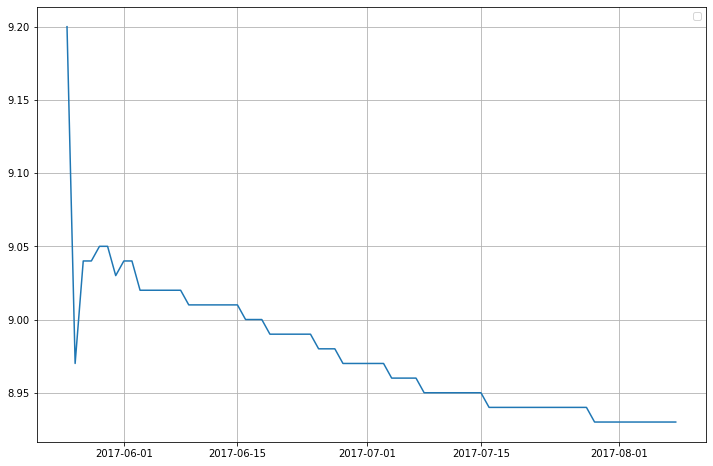

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))
plt.plot(tmp['date'], tmp['point'])
plt.legend(loc='best')
plt.grid()
plt.show()

In [21]:
movie_best.head(10)

,point
name,
댄서,914.60
"서서평, 천천히 평온하게",889.64
오두막,861.65
라라랜드,858.89
너의 이름은.,738.42
노무현입니다,682.24
보스 베이비,644.21
겟 아웃,630.62
기쿠지로의 여름,613.43


## 영화별 날짜 변화에 따른 평점 변화 확인하기

In [35]:
movie_pivot = pd.pivot_table(movie, index=["date"],  # 옆으로 나타내는 표 
                             columns=['name'], values=['point'])
movie_pivot.head()

point                                                        \
name         10분 47 미터 500일의 썸머 7년-그들이 없는 언론 7번째 내가 죽던 날 7인의 사무라이 8 마일   
date                                                                     
2017-05-01  8.89   NaN      NaN          NaN         NaN      NaN  NaN   
2017-05-02  8.89   NaN      NaN          NaN         NaN      NaN  NaN   
2017-05-03  8.89   NaN      NaN          NaN         NaN      NaN  NaN   
2017-05-04  8.89   NaN      NaN          NaN         NaN      NaN  NaN   
2017-05-05  8.89   NaN      NaN          NaN         NaN      NaN  NaN   

                                                ...                         \
name       가디언즈 오브 갤럭시 가디언즈 오브 갤럭시 VOL. 2 겟 아웃  ... 하울의 움직이는 성 하이큐!! 끝과 시작   
date                                            ...                          
2017-05-01        8.56                NaN  NaN  ...        NaN         NaN   
2017-05-02        8.56                NaN  NaN  ...        NaN         NaN   
2017-05-03         NaN               9.22  NaN  ...        NaN         NaN   
2017-05-04         NaN               9.15  NaN  ...        NaN         NaN   
2017-05-05         NaN               9.08  NaN  ...        NaN         NaN   

                                                                                
name         한공주 해리가 샐리를 만났을 때 핵소 고지 행복 목욕탕 헤드윅 환상의 빛 흑집사 : 북 오브 더 아틀란틱 히든 피겨스  
date                                                                            
2017-05-01  8.78          8.89   NaN   8.70 NaN   NaN              9.20   9.38  
2017-05-02  8.78          8.89   NaN   8.68 NaN   NaN              9.21   9.37  
2017-05-03  8.78          8.89   NaN   8.70 NaN   NaN              9.22   9.38  
2017-05-04  8.78           NaN   NaN   8.67 NaN   NaN              9.23   9.38  
2017-05-05  8.78           NaN   NaN   8.69 NaN   NaN              9.24   9.37  

[5 rows x 204 columns]

In [36]:
movie_pivot.columns = movie_pivot.columns.droplevel()

In [37]:
movie_pivot.head()

name,10분,47 미터,500일의 썸머,7년-그들이 없는 언론,7번째 내가 죽던 날,7인의 사무라이,8 마일,가디언즈 오브 갤럭시,가디언즈 오브 갤럭시 VOL. 2,겟 아웃,...,하울의 움직이는 성,하이큐!! 끝과 시작,한공주,해리가 샐리를 만났을 때,핵소 고지,행복 목욕탕,헤드윅,환상의 빛,흑집사 : 북 오브 더 아틀란틱,히든 피겨스
date,,,,,,,,,,,,,,,,,,,,,
2017-05-01,8.89,NaN,NaN,NaN,NaN,NaN,NaN,8.56,NaN,NaN,...,NaN,NaN,8.78,8.89,NaN,8.70,NaN,NaN,9.20,9.38
2017-05-02,8.89,NaN,NaN,NaN,NaN,NaN,NaN,8.56,NaN,NaN,...,NaN,NaN,8.78,8.89,NaN,8.68,NaN,NaN,9.21,9.37
2017-05-03,8.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.22,NaN,...,NaN,NaN,8.78,8.89,NaN,8.70,NaN,NaN,9.22,9.38
2017-05-04,8.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.15,NaN,...,NaN,NaN,8.78,NaN,NaN,8.67,NaN,NaN,9.23,9.38
2017-05-05,8.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.08,NaN,...,NaN,NaN,8.78,NaN,NaN,8.69,NaN,NaN,9.24,9.37


In [38]:
import platform
from matplotlib import font_manager, rc

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

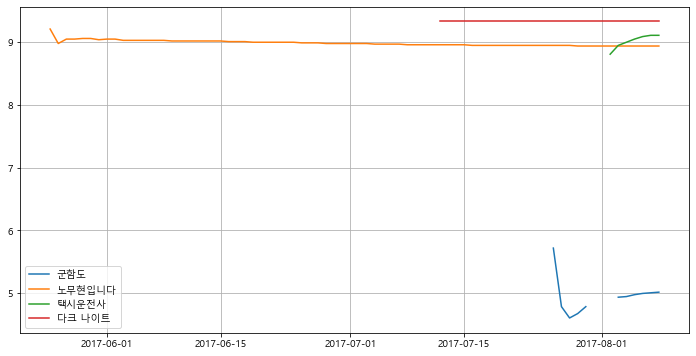

In [43]:
target_col = ['군함도', '노무현입니다', '택시운전사', '다크 나이트']
plt.figure(figsize=(12,6)) # 사이즈 
plt.plot(movie_pivot[target_col]) # 데이터 
plt.legend(target_col, loc='best') # 좌측 하단 선 박스 
plt.grid()
plt.show()

1. 2021년 1월 1일 ~ 100일간 펼ㅇ점이 가증 놓은 1~5위 영화

In [86]:
from urllib.request import urlopen

url_base = "http://movie.naver.com/"
url_syb = "movie/sdb/rank/rmovie.nhn?sel=pnt&date=20210101"

page = urlopen(url_base+url_syb) # url 이 길어서 자른것을 붙임.

soup = BeautifulSoup(page, "html.parser")
soup


<!DOCTYPE html>

<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="me2:image">
<meta content="네이버영화 " property="me2:post_tag">
<meta content="네이버영화" property="me2:category1"/>
<meta content="" property="me2:category2"/>
<meta content="랭킹 : 네이버 영화" property="og:title"/>
<meta content="영화, 영화인, 예매, 박스오피스 랭킹 정보 제공" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=pnt&amp;date=20210101" property="og:url"/>
<meta content="http://static.naver.net/m/movie/icons/OG_270_270.png" property="og:image"/><!-- http://static.naver.net/m/movie/im/navermovie.jpg -->
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
<meta content="네이버 영화" property="og:article:author"/>


In [81]:
movie_name = [soup.find_all('div', 'tit5')[n].a.string for n in range(0, 49)]
movie_name

['그린 북',
 '가버나움',
 '가나의 혼인잔치: 언약',
 '디지몬 어드벤처 라스트 에볼루션 : 인연',
 '먼 훗날 우리',
 '베일리 어게인',
 '언플랜드',
 '원더',
 '극장판 바이올렛 에버가든',
 '아일라',
 '당갈',
 '포드 V 페라리',
 '주전장',
 '쇼생크 탈출',
 '터미네이터 2:오리지널',
 '나 홀로 집에',
 '덕구',
 '라이언 일병 구하기',
 '보헤미안 랩소디',
 '월-E',
 '클래식',
 '사운드 오브 뮤직',
 '헬프',
 '빽 투 더 퓨쳐',
 '매트릭스',
 '인생은 아름다워',
 '부활: 그 증거',
 '포레스트 검프',
 '살인의 추억',
 '위대한 쇼맨',
 '글래디에이터',
 '소년시절의 너',
 '타이타닉',
 '센과 치히로의 행방불명',
 '아이즈 온 미 : 더 무비',
 '토이 스토리 3',
 '어벤져스: 엔드게임',
 '알라딘',
 '죽은 시인의 사회',
 '캐스트 어웨이',
 '헌터 킬러',
 '레옹',
 '동주',
 '반지의 제왕: 왕의 귀환',
 '히든 피겨스',
 '아이 캔 스피크',
 '쉰들러 리스트',
 '집으로...',
 '클레멘타인']

In [83]:
movie_point = [soup.find_all('td', 'point')[n].string for n in range(0, 49)]
movie_point

['9.59',
 '9.59',
 '9.59',
 '9.55',
 '9.54',
 '9.53',
 '9.52',
 '9.50',
 '9.49',
 '9.49',
 '9.49',
 '9.49',
 '9.48',
 '9.44',
 '9.44',
 '9.43',
 '9.42',
 '9.42',
 '9.42',
 '9.41',
 '9.41',
 '9.41',
 '9.40',
 '9.40',
 '9.40',
 '9.40',
 '9.40',
 '9.40',
 '9.40',
 '9.40',
 '9.40',
 '9.39',
 '9.39',
 '9.39',
 '9.39',
 '9.39',
 '9.38',
 '9.38',
 '9.38',
 '9.38',
 '9.38',
 '9.37',
 '9.37',
 '9.37',
 '9.37',
 '9.37',
 '9.37',
 '9.37',
 '9.36']

In [84]:
date = pd.date_range('2021-1-1', periods=100, freq='D') 
date

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10', '2021-01-11', '2021-01-12',
               '2021-01-13', '2021-01-14', '2021-01-15', '2021-01-16',
               '2021-01-17', '2021-01-18', '2021-01-19', '2021-01-20',
               '2021-01-21', '2021-01-22', '2021-01-23', '2021-01-24',
               '2021-01-25', '2021-01-26', '2021-01-27', '2021-01-28',
               '2021-01-29', '2021-01-30', '2021-01-31', '2021-02-01',
               '2021-02-02', '2021-02-03', '2021-02-04', '2021-02-05',
               '2021-02-06', '2021-02-07', '2021-02-08', '2021-02-09',
               '2021-02-10', '2021-02-11', '2021-02-12', '2021-02-13',
               '2021-02-14', '2021-02-15', '2021-02-16', '2021-02-17',
               '2021-02-18', '2021-02-19', '2021-02-20', '2021-02-21',
               '2021-02-22', '2021-02-23', '2021-02-24', '2021-02-25',
      

In [85]:
len(movie_date), len(movie_name), len(movie_point)

(0, 0, 49)

In [87]:
movie = pd.DataFrame({'date':movie_date, 'name':movie_name, 
                                      'point':movie_point})
movie.head()

ValueError: arrays must all be same length

In [56]:
soup.find_all('td', 'point')[0].string # 'td'의 point에서 0번째를 가지고와 string(문자열) 으로

'9.59'

In [82]:
import urllib
from tqdm import tqdm_notebook

movie_date = []
movie_name = []
movie_point = []

for today in tqdm_notebook(date):
    html = "http://movie.naver.com/" + \
                                    "movie/sdb/rank/rmovie.nhn?sel=pnt&date=2021010}"
    response = urlopen(html.format(date=
                                   urllib.parse.quote(today.strftime('%Y%m%d'))))
    
    #date=urllib.parse.quote(today.strftime('%Y%m%d'))
    #print(date)
    soup = BeautifulSoup(response, "html.parser")
    
    end = len(soup.find_all('td', 'point'))
    
    movie_date.extend([today for n in range(0, end)])
    movie_name.extend([soup.find_all('div', 'tit5')[n].a.string for n in range(0, end)])
    movie_point.extend([soup.find_all('td', 'point')[n].string for n in range(0, end)])

ValueError: Single '}' encountered in format string

2. 날짜별 펼점의 변화응 그래프로 그리기 